[(1, 0), (2, 0), (3, 9/32), (4, 1/4), (5, 85/256), (6, 567/2048), (7, 1267/4096), (8, 1075/4096), (9, 16479/65536), (10, 54185/262144), (11, 203115/1048576), (12, 1358039/8388608)]
[(1, 0), (2, 0), (3, 0), (4, 1/32), (5, 0), (6, 33/1024), (7, 77/4096), (8, 219/8192), (9, 1989/131072), (10, 795/32768), (11, 13343/1048576), (12, 68063/4194304)]


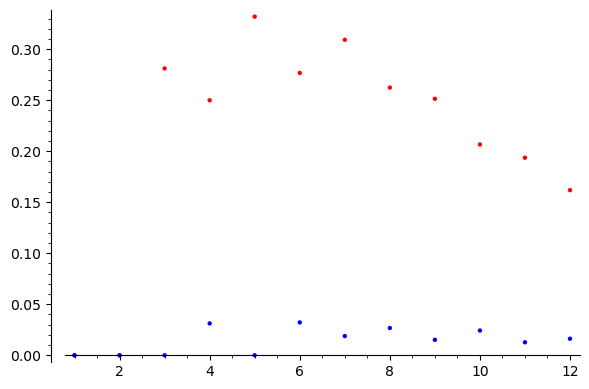

In [1]:
n_list = [n for n in range(1,13)]
sumdom_list = []
difdom_list = []
for n in n_list:
    G = DihedralGroup(n)
    sumdom = 0
    difdom = 0
    balanc = 0
    for S in powerset(G):
        sumset = set()
        difset = set()
        for g in S:
            for h in S:
                sumset.add(g*h)
                difset.add(g*(h^(-1)))
        if len(sumset) > len(difset):
            sumdom += 1
        elif len(sumset) < len(difset):
            difdom += 1
        else:
            balanc += 1
    sumdom_list.append(sumdom / (4^n))
    difdom_list.append(difdom / (4^n))
sumdom_data = [(n_list[i],sumdom_list[i]) for i in range(len(n_list))]
difdom_data = [(n_list[i],difdom_list[i]) for i in range(len(n_list))]

print(sumdom_data)
print(difdom_data)

# create an empty plot object
a = plot([])

# add a plot of the data, in red
a += list_plot(sumdom_data,color='red')
a += list_plot(difdom_data,color='blue')
show(a)

In [31]:
n=12
G = DihedralGroup(n)
for m in range(1,n+1):
    print("m = "+str(m))
    sumdom = 0
    difdom = 0
    balanc = 0
    MSTD = [[] for i in range(m+1)]
    MDTS = [[] for i in range(m+1)]
    pirot = G(tuple([i for i in range(1,n+1)]))^(n//2)
    for S in powerset(G):
        if len(S)!=m:
            continue
        sumset = set()
        difset = set()
        numflips = 0
        for g in S:
            if g==g^(-1) and g!=G.identity() and (n%2!=0 or g!=pirot):
                numflips+=1
            for h in S:
                sumset.add(g*h)
                difset.add(g*(h^(-1)))
        if len(sumset) > len(difset):
            sumdom += 1
            MSTD[numflips].append(S)
        elif len(sumset) < len(difset):
            difdom += 1
            MDTS[numflips].append(S)
        else:
            balanc += 1

    for i in range(m+1):
        print("MSTD"+str(i)+": "+str(len(MSTD[i])))
    for j in range(m+1):
        print("MDTS"+str(j)+": "+str(len(MDTS[j])))

m = 1
MSTD0: 0
MSTD1: 0
MDTS0: 0
MDTS1: 0
m = 2
MSTD0: 0
MSTD1: 120
MSTD2: 0
MDTS0: 0
MDTS1: 0
MDTS2: 0
m = 3
MSTD0: 0
MSTD1: 720
MSTD2: 648
MSTD3: 0
MDTS0: 168
MDTS1: 0
MDTS2: 0
MDTS3: 0
m = 4
MSTD0: 0
MSTD1: 1992
MSTD2: 3672
MSTD3: 2184
MSTD4: 0
MDTS0: 336
MDTS1: 0
MDTS2: 24
MDTS3: 0
MDTS4: 0
m = 5
MSTD0: 0
MSTD1: 3456
MSTD2: 11832
MSTD3: 12648
MSTD4: 4920
MSTD5: 0
MDTS0: 576
MDTS1: 960
MDTS2: 696
MDTS3: 72
MDTS4: 0
MDTS5: 0
m = 6
MSTD0: 24
MSTD1: 7104
MSTD2: 21648
MSTD3: 37616
MSTD4: 28164
MSTD5: 7920
MSTD6: 0
MDTS0: 300
MDTS1: 432
MDTS2: 3816
MDTS3: 1440
MDTS4: 48
MDTS5: 0
MDTS6: 0
m = 7
MSTD0: 0
MSTD1: 10272
MSTD2: 37128
MSTD3: 71808
MSTD4: 85752
MSTD5: 45864
MSTD6: 9168
MSTD7: 0
MDTS0: 0
MDTS1: 0
MDTS2: 5064
MDTS3: 14304
MDTS4: 4704
MDTS5: 120
MDTS6: 0
MDTS7: 0
m = 8
MSTD0: 0
MSTD1: 9264
MSTD2: 49584
MSTD3: 105120
MSTD4: 158190
MSTD5: 139920
MSTD6: 54048
MSTD7: 7920
MSTD8: 0
MDTS0: 0
MDTS1: 0
MDTS2: 2112
MDTS3: 20544
MDTS4: 28608
MDTS5: 5616
MDTS6: 408
MDTS7: 0
MDTS8: 0
m = 9
MST

In [42]:
#run this code block before the next one. It will take a couple hours.
import time
start = time.time()
n = 10007
print("n = "+str(n))
G = DihedralGroup(n)
listG = list(G) 
print("list created!")
end = time.time()
print("Time taken in seconds: "+str(end-start))

n = 10007
list created!
Time taken in seconds: 9117.199604511261


In [45]:
import random
start = time.time() #This code will take several hours.
numtrials = 30
mvalues = [500,550,600,650,700]
#mvalues = [180]
for m in mvalues:
    print()
    print("m = "+str(m))
    avgsumdom = 0
    avgdifdom = 0
    avgbalanc = 0
    for t in range(numtrials):
        #print("trial number: "+str(t))
        S = random.sample(listG,m)
        sumset = set()
        difset = set()
        for g in S:
            for h in S:
                sumset.add(g*h)
                difset.add(g*(h^(-1)))
        print()
        if len(sumset) > len(difset):
            avgsumdom += 1
        elif len(sumset) < len(difset):
            avgdifdom += 1
        else:
            avgbalanc += 1
    avgsumdom/=numtrials
    avgdifdom/=numtrials
    avgbalanc/=numtrials
    print("Average proportion of MSTD sets:" + str(avgsumdom))
    print("Average proportion of MDTS sets:" + str(avgdifdom))
    print("Average proportion of balanced sets:" + str(avgbalanc))
end = time.time()
print("Time taken in seconds: "+str(end-start))


m = 650
Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20013

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20013

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20013

Sumset size: 20014
Difset size: 20013

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 20014
Difset size: 20014

Sumset size: 200